First, we need to create a data frame (with mock data) to keep track of room information and current tenants information of Luna apartment. The data frame has columns of the room number, floor plan, square feet, rent, tenant name, tenant date of birth, tenant job,  lease begin date. Assume the apartment has 16 floors, each floor has 20 rooms. There are 4 floor plans:
1. 1b1b, square feet is 550, base rent is 1600;
2. 1b1b, square feet is 750, base rent is 1750;
3. 2b1b, square feet is 775, base rent is 1900;
4. 2b2b, square feet is 950, base rent is 2200.
As the floor increases by 1, the rent will increase by 1%. For example,  the rent of 1b1b(square feet 775) on the floor 7 is 1900 + 1900 * 1% * (7-1) = 2014. Each floor has 5 rooms of 1b1b(550 square feet), 5 rooms of  1b1b(750 square feet), 5 rooms of 2b1b, 5 rooms of 2b2b. Assume there are 20 rooms empty(without tenants) now (randomly selected)

In [ ]:
pip install Faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import random
from faker import Faker
from IPython.display import display

# Initialize the Faker generator with a fixed seed
faker = Faker()
Faker.seed(331)

# Define the floor plans
floor_plans = {
    1: {'type': '1b1b', 'sqft': 550, 'base_rent': 1600},
    2: {'type': '1b1b', 'sqft': 750, 'base_rent': 1750},
    3: {'type': '2b1b', 'sqft': 775, 'base_rent': 1900},
    4: {'type': '2b2b', 'sqft': 950, 'base_rent': 2200}
}

# Create an empty list to store apartment data
apartment_data = []

# Loop through each floor and room
for floor in range(1, 17):
    for room in range(1, 21):
        floor_plan = floor_plans[(room - 1) // 5 + 1]  # Determine the floor plan based on the floor
        sqft = floor_plan['sqft']
        base_rent = floor_plan['base_rent']
        rent = base_rent + base_rent * (floor-1) * 0.01  # Calculate rent based on floor

        apartment_data.append({
            'Unit Number': f"{floor:02d}{room:02d}",
            'Floor Plan': floor_plan['type'],
            'Square Feet': sqft,
            'Rent': rent,
            'Tenant Name': faker.name(),
            'Tenant Date of Birth': faker.date_of_birth(minimum_age=18, maximum_age=70),
            'Tenant Job': faker.job(),
            'Tenant Email': faker.email(),
            'Lease Begin Date': faker.date_this_year(),
        })

# Create 20 empty rooms
random.seed(10)
empty_rooms = random.sample(apartment_data, 20)
for room in empty_rooms:
    room['Tenant Name'] = "N/A"
    room['Tenant Date of Birth'] = "N/A"
    room['Tenant Job'] = "N/A"
    room['Tenant Email'] = "N/A"
    room['Lease Begin Date'] = "N/A"

# Create the DataFrame
df = pd.DataFrame(apartment_data)
display(df.head())

# Find all the units with tenants
occupied = df[df['Tenant Name'] != 'N/A']
occupied_units = occupied[["Unit Number", 'Tenant Name']]

# Create a list of tenants with delivery package.
random.seed(20)
package_list = random.sample(occupied_units.values.tolist(), 20)

,Unit Number,Floor Plan,Square Feet,Rent,Tenant Name,Tenant Date of Birth,Tenant Job,Tenant Email,Lease Begin Date
0,0101,1b1b,550,1600.0,Erica Jackson,1995-08-21,"Civil engineer, contracting",qmcdonald@example.com,2023-08-15
1,0102,1b1b,550,1600.0,Wendy Butler,1997-11-29,Podiatrist,iwilliams@example.com,2023-07-24
2,0103,1b1b,550,1600.0,Patricia Pham,1989-06-21,Event organiser,lawrenceharvey@example.org,2023-02-01
3,0104,1b1b,550,1600.0,Lori Kelly,1971-06-20,Soil scientist,johnsonjasmin@example.org,2023-02-23
4,0105,1b1b,550,1600.0,Joshua Figueroa,1965-07-27,"Civil engineer, consulting",nichole70@example.com,2023-01-14


In [ ]:
# Get the information of empty units
available = df[df['Tenant Name'] == 'N/A']
available_units = available[["Unit Number", "Floor Plan", "Square Feet", "Rent"]]
# Store the information of all empty units in a dictionary
dict = available_units.to_dict('list')
# Store the information of units with two bedrooms.
l1 = []    # store unit number
l2 = []    # store floor plan
l3 = []    # store square feet
l4 = []    # store rent
two_dict = {"Unit Number": l1, "Floor Plan": l2, "Square Feet": l3, "Rent": l4}
index = 0
for i in dict["Floor Plan"]:
    if i[0] == '2':
        l1.append(dict["Unit Number"][index])
        l2.append(dict["Floor Plan"][index])
        l3.append(dict["Square Feet"][index])
        l4.append(dict["Rent"][index])
    index += 1

Scenario 1: Scheduling an Apartment Viewing with Luna Urban Apartment Chatbot

The Luna Urban Apartment Chatbot is designed to simplify the process of scheduling apartment viewings. Here's how it works:

Gathering User Preferences:
The chatbot initiates the conversation by inquiring about the number of people who will be residing in the apartment and the user's rental budget.
Depending on the number of occupants:
For one or two people, the chatbot offers a variety of apartment types.
For groups of more than two, only 2-bedroom options (either 2b1b or 2b2b) are presented.
Displaying Available Options:
Based on the user's budget and preferences, the chatbot showcases a list of suitable apartments, detailing the floor, floor plan, square footage, and rent.
Users can then select their preferred apartment type from the list.
Scheduling the Tour:
The chatbot provides a list of available dates for the upcoming three days, allowing users to pick their preferred date.
Once the date is chosen, the chatbot displays available time slots for that specific day. Users can then select their desired time.
Upon finalizing the date and time, the chatbot confirms the scheduled tour, providing users with a summary of their appointment details.
Data Collection & Analysis:
The system maintains a record of all bookings, capturing details like the recommended apartment types and chosen tour times.
Recommendation Analysis: By evaluating the frequency of each recommended apartment type, the property management gains insights into potential renters' preferences. This data can influence decisions regarding apartment promotions or availability adjustments.
Tour Time Analysis: By examining the distribution of booked times, the most sought-after time slots for tours are identified. This aids in effective staff scheduling and resource allocation during high-demand periods.



In [ ]:
# This function plots popularity of different floor plans in 2023
def plot_popularity():
    import pandas as pd
    import matplotlib.pyplot as plt

    from google.colab import drive
    drive.mount('/content/drive')
    book_df = pd.read_csv('/content/drive/MyDrive/book_data.csv', dtype={'Unit Number': object})

    # book_df = pd.read_csv("book_data.csv", dtype={'Unit Number': object})

    # Join the book dataframe and apartment dataframe to get information on apoointed units.
    unit_df = df[['Unit Number', 'Floor Plan', 'Square Feet', 'Rent']]
    analyze_df = pd.merge(book_df, unit_df, how = 'left', on = 'Unit Number')
    # Combine 'Floor Plan' and 'Square Feet' into one column
    analyze_df['Square Feet'] = analyze_df['Square Feet'].map(str)
    analyze_df['Type'] = analyze_df['Floor Plan'] + ' ' + analyze_df['Square Feet'] + 'SQFT'

    # convert the 'Tour Date' column to datetime format and get 'Tour Month'
    analyze_df['Tour Date']= pd.to_datetime(analyze_df['Tour Date'])
    analyze_df['Tour Month'] = analyze_df['Tour Date'].dt.month

    # Group by unit type and count the number of viewings
    analyze_group = analyze_df.groupby(['Tour Month', 'Type'])['Unit Number'].count().reset_index()
    analyze_group = analyze_group.pivot(index='Tour Month', columns='Type', values='Unit Number')
    # Plot
    plt.figure(figsize=(10, 8))
    analyze_group.plot(kind = "bar")
    plt.title("Popularity of Different Floor Plans in Luna Apartment 2023")
    plt.xlabel("Month")
    plt.ylabel("Views")
    plt.show()

In [ ]:
name_l =[]
people_l = []
budget_l = []
unit_l = []
date_l = []
time_l = []
book = {"Name": name_l, "Number of People": people_l, "Budget": budget_l, "Unit Number": unit_l, "Tour Date": date_l, "Tour Time": time_l}

In [ ]:
def book_tour():
    from datetime import date, timedelta

    name = input("What's your name? ")
    people = int(input("How many people will be living in the apartment? (1-4) "))
    if people == 1 or people == 2:
        choose = dict
    elif people == 2 or people ==3 or people == 4:
        choose = two_dict
    else:
        print("Sorry, we don't have appropriate units for you.")

    ans = input("Do you want to check popularity of our floor plans? y/n")
    if ans == 'y' or ans == 'yes':
      plot_popularity()

    budget = float(input("What is your rental budget? "))
    index = 0
    # initialize the recommendation list
    f = []
    p = []
    s = []
    r = []
    for i in choose["Rent"]:
        if budget >= i:
            f.append(choose["Unit Number"][index])
            p.append(choose["Floor Plan"][index])
            s.append(choose["Square Feet"][index])
            r.append(choose["Rent"][index])
        index += 1

    if len(f) == 0:
        print("Sorry, we don't have appropriate units for you.")
    else:
        for i in range(len(f)):
            print(f"{i+1}. floor: {int(f[i][:2])}, floor plan: {p[i]}, square feet: {s[i]}, rent: {r[i]}")
        choice = int(input("You can book an apartment viewing from the following, please enter the number (1/2...): "))

        # Assume you can only book the viewing for the next 3 days
        for i in range(3):
            print(f"{i+1}.{date.today()+timedelta(i+1)}")

        date_choice = int(input("Please choose a date by entering the corresponding number: "))
        if 1 <= date_choice <= 3:
            tour_date = date.today()+timedelta(date_choice)
        else:
            print("Invalid choice.")

        available_times = ["10:00 AM", "2:00 PM", "4:00 PM"]
        print("Available tour times:")
        for i, time in enumerate(available_times):
            print(f"{i + 1}. {time}")
        time_choice = int(input("Please choose a time by entering the corresponding number: "))
        if 1 <= time_choice <= len(available_times):
            tour_time = available_times[time_choice - 1]
        else:
            print("Invalid choice.")

        print(f"Your tour has been scheduled for {tour_date} at {tour_time}.")

        name_l.append(name)
        people_l.append(people)
        budget_l.append(budget)
        unit_l.append(f[choice-1])
        date_l.append(tour_date)
        time_l.append(tour_time)




**Scenario 2: request facility maintenance**

The Resident Maintenance Request Chatbot is designed to handle maintenance requests from residents of Luna Urban Apartment. When a resident has a maintenance issue, they can interact with the chatbox to describe the problem.

The chatbox then asks if the maintenance staff is allowed to enter the apartment to make repairs without the resident being present. If the resident prefers to be present during the repair, the chatbox asks for the available dates and times to schedule the maintenance.

This process ensures that repairs are done in a manner that respects the resident's privacy and preferences, and it streamlines the scheduling of maintenance, making it more efficient for both residents and maintenance staff.


In [ ]:
def maintenance_request():
    room_number = input("Please enter your room number: ")
    name = input("Please enter your name: ")

    problem_description = input("Please describe the maintenance issue: ")
    permission = input("Can our staff enter to fix it without you present? (yes/no) ")

    if permission.lower() == 'no':
        print("Please provide your available dates and times for maintenance.")
        available_dates = input("Available dates (e.g., 2023-08-15, 2023-08-16): ").split(', ')
        available_times = input("Available times (e.g., 10:00 AM, 2:00 PM): ").split(', ')
        print("Thank you! We will schedule the maintenance at one of your provided dates and times.")
    else:
        print("Thank you! Maintenance will be done as soon as possible.")

    print(f"Your request for {problem_description} in room {room_number} has been submitted, {name}.")

# Call the function to test
#maintenance_request()





**Scenario 3: reserve for a housekeeping service**

There introduced a cleaning service for its residents in luna urban apartment. This service aims to offering specialized cleaning services, such as carpet cleaning, window cleaning, and bathroom cleaning. The reservation system beleow makes a booking system for their appointment at their preferred time.

When residents want to make a reservation, they are first asked to provide their unit number to identify the resident and also determine the exact pricing based on floorplan.

Residents can specify the date and a time slot when they want the cleaning service. The available time slots are:
10AM to 12PM
2PM to 4PM
4PM to 6PM

The system will check the availability of the chosen service in the selected time slot automatically. Each service has a limited number of slots available per time frame. If the slot is already fully booked, the resident is informed and asked to choose another time.

 Residents can also view the current reservations, which provides an overview of all the booked services, their dates, and time slots.


In [ ]:
def ask_unit_number():
    return input("Enter your unit number: ")

def ask_service_type():
    print("Please select the type of service you need:")
    service_map = {
        "1": "Carpet Cleaning",
        "2": "Window Cleaning",
        "3": "Bathroom Cleaning",
    }
    for key, val in service_map.items():
        print(f"{key}. {val}")
    choice = input()
    return service_map[choice]

def get_price(unit_number, service):
    if unit_number[-2:] in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']:
        prices = {"Carpet Cleaning": 60, "Window Cleaning": 80, "Bathroom Cleaning": 90}
    else:
        prices = {"Carpet Cleaning": 80, "Window Cleaning": 90, "Bathroom Cleaning": 100}
    return prices[service]

def ask_reservation_date():
    return input("Enter the date you'd like to reserve (e.g., 2023-08-23): ")

def ask_reservation_time():
    print("Select the time slot you'd like to reserve:")
    time_slot_map = {
        "1": "10AM to 12PM",
        "2": "2PM to 4PM",
        "3": "4PM to 6PM",
    }
    for key, val in time_slot_map.items():
        print(f"{key}. {val}")
    choice = input()
    return time_slot_map[choice]

def is_slot_available(date, time_slot, service):
    if date not in reservations:
        return True
    if time_slot not in reservations[date]:
        return True
    if service not in reservations[date][time_slot]:
        return True
    if reservations[date][time_slot][service] < time_slots[time_slot][service]:
        return True
    return False

def make_reservation():
    unit_number = ask_unit_number()
    service = ask_service_type()
    price = get_price(unit_number, service)
    date = ask_reservation_date()
    time_slot = ask_reservation_time()

    if is_slot_available(date, time_slot, service):
        if date not in reservations:
            reservations[date] = {}
        if time_slot not in reservations[date]:
            reservations[date][time_slot] = {}
        if service not in reservations[date][time_slot]:
            reservations[date][time_slot][service] = 0

        reservations[date][time_slot][service] += 1
        print(f"Successfully reserved! The service will cost ${price}. Thank you for reserving, looking forward to meeting you soon.")
    else:
        print("Sorry, this time has been fully-booked. Please check your calendar and choose another appointment time.")

def display_reservations():
    print("Current reservations:")
    for date, times in reservations.items():
        print(date)
        for time_slot, services in times.items():
            print(f"  {time_slot}")
            for service, count in services.items():
                print(f"    {service}: {count} reservation(s)")

def housekeeping_reservation():
    while True:
        print("Select an option:")
        print("1. Make a reservation")
        print("2. View reservations")
        print("3. Exit")
        choice = input()

        if choice == "1":
            make_reservation()
        elif choice == "2":
            display_reservations()
        elif choice == "3":
            break

time_slots = {
    "10AM to 12PM": {"Carpet Cleaning": 2, "Window Cleaning": 2, "Bathroom Cleaning": 2},
    "2PM to 4PM": {"Carpet Cleaning": 2, "Window Cleaning": 2, "Bathroom Cleaning": 2},
    "4PM to 6PM": {"Carpet Cleaning": 2, "Window Cleaning": 2, "Bathroom Cleaning": 2},
}
reservations = {}



Mounted at /content/drive


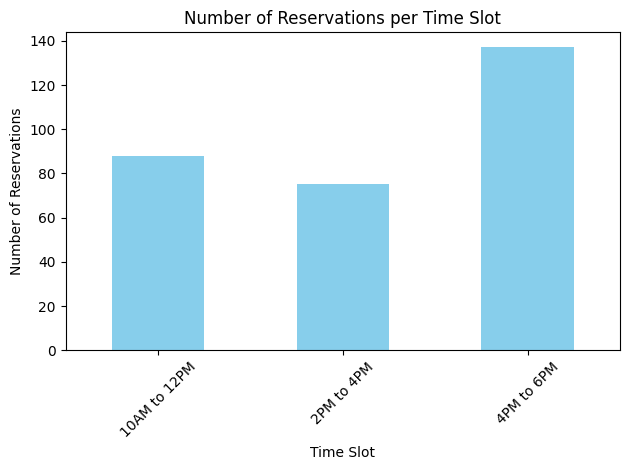

In [ ]:
# Plot number of reservations per time slot
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

housekeeping_df = pd.read_csv('/content/drive/MyDrive/housekeeping_reservations.csv')
# housekeeping_df = pd.read_csv('housekeeping_reservations.csv')

count_data = housekeeping_df.groupby('Time Slot').size()

count_data.plot(kind='bar', color='skyblue')
plt.title('Number of Reservations per Time Slot')
plt.ylabel('Number of Reservations')
plt.xlabel('Time Slot')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Scenario 4: Manage Delivery with Chatbot Verification**

In modern urban living, package deliveries have become a frequent occurrence. However, with the rise in deliveries, there's also an increase in package misplacements or thefts. To address this concern, Luna Urban Apartment has introduced a chatbot-assisted package verification system.

How it works:

Tenant Verification:
The tenant provides their unit number.
If a package is available for the given unit, the tenant is prompted to verify their identity by entering their name.
Package Delivery Options:
Once verified, the tenant has two options:
Allow the package to be placed in front of their door.
Opt for a secure pickup at the doorman.
Secure Pickup Code:
If the tenant chooses the doorman pickup, the chatbot generates a unique, random code.
The tenant must provide this code to the doorman to retrieve their package, ensuring an added layer of security.
Error Handling:
If the name entered doesn't match the unit number, the chatbot informs the tenant of an identification failure.
If there's no package for the provided unit number, the tenant is informed accordingly.

In [ ]:
def check_delivery(list = package_list):
    # cancel the effect of random.seed(20), to randomly generate the code every time requested
    import time
    import random
    t = 1000 * time.time() # current time in milliseconds
    random.seed(int(t) % 2**32)

    dict = {}
    # Create a package dictionary with key: unit number, value: tenant name
    for i in list:
        dict[i[0]] = i[1]
    # print(dict)

    # Create a dictionary to record the code to get the package.
    code_dict = {}

    unit_num = input("What's your unit number? ")
    if unit_num in dict.keys():
        user = input("Your package is here. Please enter your name to verify your identification: ")
        name = dict[unit_num]
        if user == name:
                ans = input("Do you want us to put the package in front of your door? y/n: ").lower()
                if ans == "y" or ans == "yes":
                    print("You will receive your package soon!")
                else:
                    code = random.randint(1000,9999)
                    print(f"Your code is {code}, please give this code to the doorman to get your package.")
                    code_dict[user] = code
        else:
            print("You entered the wrong name, identification failed.")
    else:
        print("We haven't received your package yet.")

    # print(code_dict)

# Try to use following unit number and tenant name to run the scenario.
# '0504': 'Victor Dickerson', '0802': 'Jasmine Paul', '0317': 'Andrew Farley', '0918': 'Theresa Haley',
# '1614': 'Darlene Hunter', '0513': 'Dr. Tracy Foster', '0115': 'Joanna Horn', '1204': 'Ryan Burton',
# '1202': 'Matthew Murphy', '0304': 'Sandra Foster', '0318': 'Matthew Marsh', '0410': 'Sharon Jones',
# '0914': 'Mr. David Barnes', '1320': 'Christine Lamb', '1618': 'Suzanne Melendez', '1305': 'Amber Carter DDS',
# '0614': 'Deborah Crane', '0610': 'Laura Moore', '0913': 'Brittney Marshall', '1002': 'Jennifer Dunn'

In [ ]:
# Interact with the chatbot
def main():
    print("Hello! How can I help you today?")
    while True:
            choice = input(f'''
            1. Schedule an apartment viewing
            2. Request facility maintenance
            3. Reserve for a housekeeping service
            4. Check my delivery
            5. Exit
            ''')

            if choice == "1":
                book_tour()
            elif choice == "2":
                maintenance_request()
            elif choice == "3":
                housekeeping_reservation()
            elif choice == "4":
                check_delivery()
            elif choice == "5":
                break
            else:
                print("Sorry, I can't understand. Please try again")
                continue

main()

Hello! How can I help you today?

            1. Schedule an apartment viewing
            2. Request facility maintenance
            3. Reserve for a housekeeping service
            4. Check my delivery
            5. Exit
            3
Select an option:
1. Make a reservation
2. View reservations
3. Exit
1
Enter your unit number: 1203
Please select the type of service you need:
1. Carpet Cleaning
2. Window Cleaning
3. Bathroom Cleaning
1
Enter the date you'd like to reserve (e.g., 2023-08-23): 2023-08-23
Select the time slot you'd like to reserve:
1. 10AM to 12PM
2. 2PM to 4PM
3. 4PM to 6PM
3
Successfully reserved! The service will cost $60. Thank you for reserving, looking forward to meeting you soon.
Select an option:
1. Make a reservation
2. View reservations
3. Exit
2
Current reservations:
2023-08-23
  4PM to 6PM
    Carpet Cleaning: 1 reservation(s)
Select an option:
1. Make a reservation
2. View reservations
3. Exit
3

            1. Schedule an apartment viewing
            2

how to extend the work：This code segment is designed to segment tenants into distinct clusters based on several features: the number of people, their budget, annual income, whether they have pets, and the distance from their work location. By standardizing the data, we ensure that each feature contributes equally to the clustering process. The KMeans algorithm is then employed to group the tenants into three distinct clusters. By examining the centers of these clusters, we can derive average characteristics for each group. With the integration of new data, this clustering approach can offer valuable insights into the diverse profiles of tenants, helping property managers tailor their services, marketing strategies, and amenities to better cater to the specific needs and preferences of each tenant group


In [ ]:
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler

# # Assuming we have already collected the additional data mentioned and added it to the df
# features = ['people', 'budget', 'annual_income', 'has_pet', 'work_location_distance']
# X = df[features]

# # Standardizing the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Using KMeans for clustering
# kmeans = KMeans(n_clusters=3)  # Assuming we want to cluster tenants into 3 clusters
# df['cluster'] = kmeans.fit_predict(X_scaled)

# # Viewing the centers of each cluster
# print(kmeans.cluster_centers_)

# import matplotlib.pyplot as plt

# # Assuming we have already collected the additional data mentioned, added it to the df, and performed clustering
# # ...

# # Visualizing the clusters using a 2D scatter plot
# plt.figure(figsize=(10, 7))
# plt.scatter(X_scaled[df['cluster'] == 0][:, 0], X_scaled[df['cluster'] == 0][:, 1], s=100, c='red', label='Cluster 1')
# plt.scatter(X_scaled[df['cluster'] == 1][:, 0], X_scaled[df['cluster'] == 1][:, 1], s=100, c='blue', label='Cluster 2')
# plt.scatter(X_scaled[df['cluster'] == 2][:, 0], X_scaled[df['cluster'] == 2][:, 1], s=100, c='green', label='Cluster 3')

# # Plotting the centroids of the clusters
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

# plt.title('Clusters of Tenants')
# plt.xlabel('People')
# plt.ylabel('Budget')
# plt.legend()
# plt.show()


KeyError: ignored